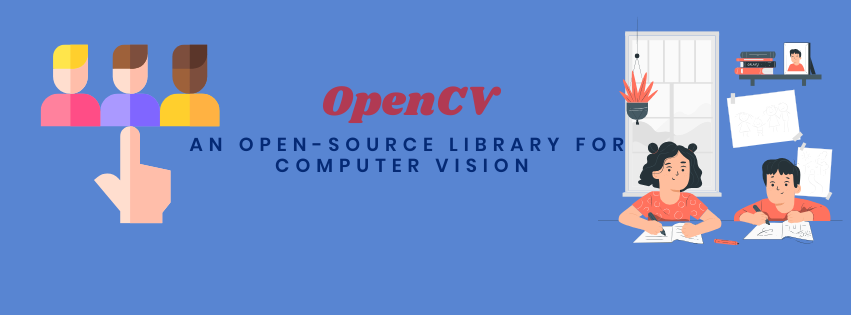

### 🏪 OpenCV

OpenCV is a popular open-source computer vision library that enables developers to perform various tasks like image processing, object detection, and video analysis in their applications.

<h4> 🌵 Nature of objects in Computer Vision</h4>

* **Static Computer Vision:**

Static computer vision deals with objects or scenes that are not changing over time.
Example: Image-based object recognition

* **Dynamic Computer Vision:**

Dynamic computer vision involves objects in real-time or scenes that are changing or moving over time.
Example: Video-based tracking of moving objects, vehicles in traffic surveillance, tracking a person's motion in a sports game.


<h3> 🌵 Some Important Understanding of OpenCV</h3>

* **Images:** An image is a 2-D/3-D array of pixels that can be either grayscale or color (BGR or RGB).

**`GrayScale Array Shape(2D):`** 32x32 (height, width)

**`RGB or BGR Array Shape(3D):`** 32x32x3 ((height, width, channels)

**note:** Red, Green, Blue (3channels) 

* **Images Loading:** Loading the images and preprocessed.

* **Channels:** In color images, each color (e.g., red, green, and blue) is represented as a separate channel. OpenCV allows you to manipulate these channels individually.

* **Grayscale:** A Grayscale images have a single channel, representing pixel intensities, and lack color information.

* **ROI (Region of Interest):** A region of interest is a specific area within an image where you want to perform a particular operation or analysis

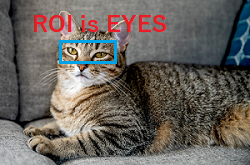


* **Histogram:** A histogram is a graphical representation of the distribution of pixel values in an image. And also provide us color intensity

**`Example:`** Pixel Intensity for Tumor Detection

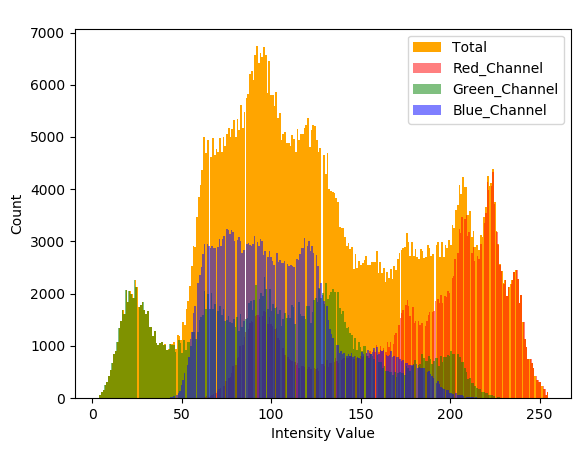

* **Thresholding:** Thresholding is a technique used to segment an image by separating pixels into two groups based on their intensity values. It's commonly used for object detection and image segmentation.


**`Example:`** Pixel Intensity for Tumor Detection

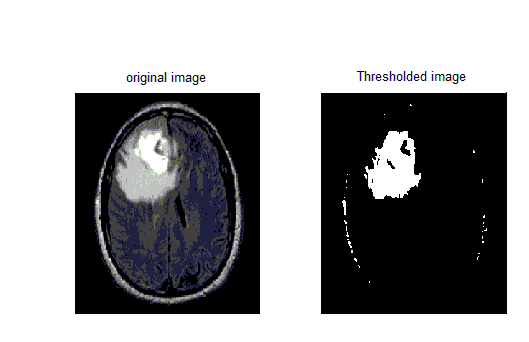

* **Contour:** A contour is a curve that connects continuous points along the boundary of an object in an image. Contours are used for object detection and shape analysis.
**Outer contours** define the outermost boundaries, while **inner contours** represent boundaries within larger objects or holes.

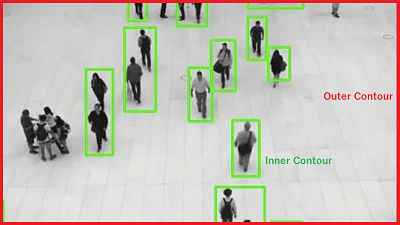

* **Morphological Operations:** Morphological operations in image processing serve to manipulate object shapes, reduce noise, enhance features, and aid in object segmentation by applying dilation, erosion, closing, and opening operations on binary or grayscale images.

**`Dilation:`** Increases the size of objects in a binary image by adding pixels to their boundaries. It's useful for joining nearby objects or filling gaps in the objects.

**`Erosion:`** Reduces the size of objects by removing pixels from their boundaries. It's helpful for noise reduction, object separation, or simplifying object shapes in a binary image.

**`Opening:`** Opening is performed by applying erosion followed by dilation on an image.

**`Closing:`** Closing is the reverse process, involving dilation followed by erosion.

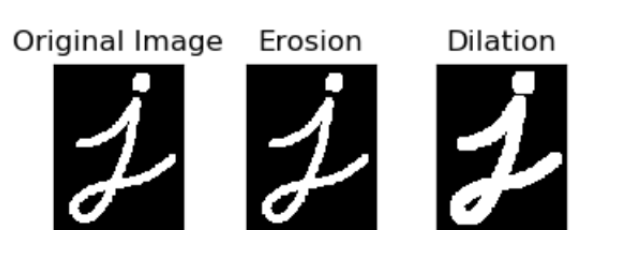


* **Filter/Kernel:** In image processing, filters (or kernels) are small matrices used to perform operations like blurring, sharpening, edge detection, and more.

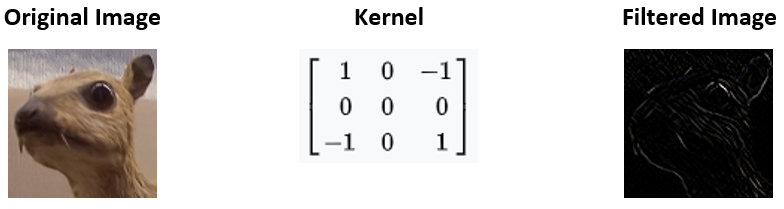

* **Detection:** Detect and locate objects or features of interest within the image, often based on their characteristics or shapes.

* **Localization:** Determine the precise location and coordinates of detected objects or features. **Object Position in an Image**

In image processing, the choice of distance measure, whether **Manhattan (L1)** or **Euclidean (L2)** distance

`Manhattan Distance:` 1. vertical and horizontal movements in localization. 2. Nonlinear Distance.

`Eucliidea Distance:` 1. diagonal movements in localization. 2. Point to Point / Straight Line.

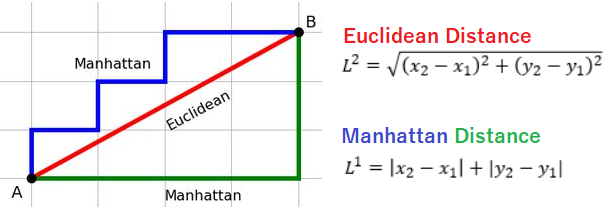


* **Classification:** If needed, classify or **label objects** based on specific criteria or characteristics.

* **Recognition:** Recognize or identify objects or patterns in the image, often using **machine learning or pattern recognition** techniques.

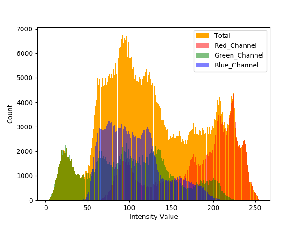

### 😃 Basic Workflow of Image Processing
<h5>Images Loading --> Channel/GrayScale --> Threshold --> ROI --> Contour --> Morphological Analysis --> Kernel/Filter --> Detection --> Localization --> Classification --> Recognition </h5>


### 🚜 Import Libraries


In [51]:
!pip install opencv-python

In [52]:
#for matplotlib
import matplotlib.pyplot as plt
#for openCV
import cv2

In [53]:
cv2.__version__

'4.8.0'

###  🌾Image Loading and Read Image

array of image: [[116 107 104]
 [115 106 103]
 [114 107 104]
 ...
 [ 90  81  77]
 [ 90  81  77]
 [ 90  81  77]]


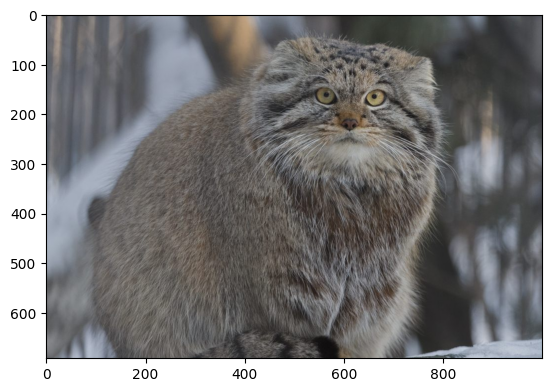

In [54]:
#read image
ImageData = cv2.imread("/kaggle/input/cat-images/cat-image.jpg")
print(f'array of image: {ImageData[0]}')

# Show the image on top of matplotlib
plt.imshow(cv2.cvtColor(ImageData, cv2.COLOR_BGR2RGB))
plt.show()

#The window will show the image until a key is pressed 
#cv2.waitKey(0)

#To  close the window 
#cv2.destroyAllWindows()

In [55]:
#Get and print the image datatype
image_dtype = type(ImageData)
print(f"Image datatype: {image_dtype}")

#shape of image
print(f"Image Shape: {ImageData.shape}")

#max and min pixel
max_pixel_image = max(ImageData[0][0])
min_pixel_image = min(ImageData[0][0])
print(f"Maximum Pixel of Image: {max_pixel_image}")
print(f"Minimum Pixel of Image: {min_pixel_image}")

Image datatype: <class 'numpy.ndarray'>
Image Shape: (692, 1000, 3)
Maximum Pixel of Image: 116
Minimum Pixel of Image: 104


### 📲 RGB and Gray Image

Image data shape with RGB:  (692, 1000, 3)
Image data shape with Grayscale:  (692, 1000)


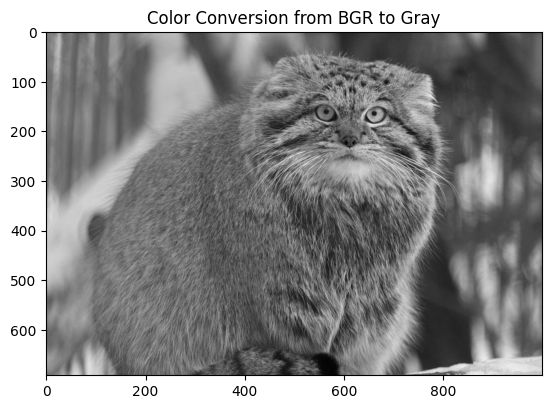

'\n# Display image\ncv2.imshow("Color Conversion Form BGR to Gray", convertBGRimageTOgrayscale)\n#The window will show the image until a key is pressed \ncv2.waitKey(0)\n#close image window\ncv2.destroyAllWindows()\n'

In [56]:
#read image
ImageDataSet = cv2.imread("/kaggle/input/cat-images/cat-image.jpg")
print("Image data shape with RGB: ", ImageDataSet.shape)

#BGR to Gray Conversion
convertBGRimageTOgrayscale = cv2.cvtColor(ImageDataSet, cv2.COLOR_BGR2GRAY)
print("Image data shape with Grayscale: ", convertBGRimageTOgrayscale.shape)

# Display the grayscale image
plt.imshow(convertBGRimageTOgrayscale, cmap='gray')
plt.title("Color Conversion from BGR to Gray")
plt.axis('on')  # Hide axes
plt.show()


#alternate of display image

"""
# Display image
cv2.imshow("Color Conversion Form BGR to Gray", convertBGRimageTOgrayscale)
#The window will show the image until a key is pressed 
cv2.waitKey(0)
#close image window
cv2.destroyAllWindows()
"""




##### 🌿 Total number of pixels in the image

In [57]:
print("Image data shape with RGB: ", ImageDataSet.shape)

TotalNumberPixel = ImageDataSet.shape[0] * ImageDataSet.shape[1] * ImageDataSet.shape[2]

print(f'\n Height of Image: {ImageDataSet.shape[0]} \n Width of Image {ImageDataSet.shape[1]}\n Channel of Image: { ImageDataSet.shape[2]}\n Total Number of Pixel: {TotalNumberPixel}')

Image data shape with RGB:  (692, 1000, 3)

 Height of Image: 692 
 Width of Image 1000
 Channel of Image: 3
 Total Number of Pixel: 2076000


### 😵 Histogram

**Function call `cv2.calcHist([b], [0], None, [256], [0, 256])` represents**

* `[b]:` blue image array
* `[0]:` channel index
* `None:` No selective Masking
* `[256]:` No of Pixel Bins
* `[0,256]:` pixel values from 0 to 255


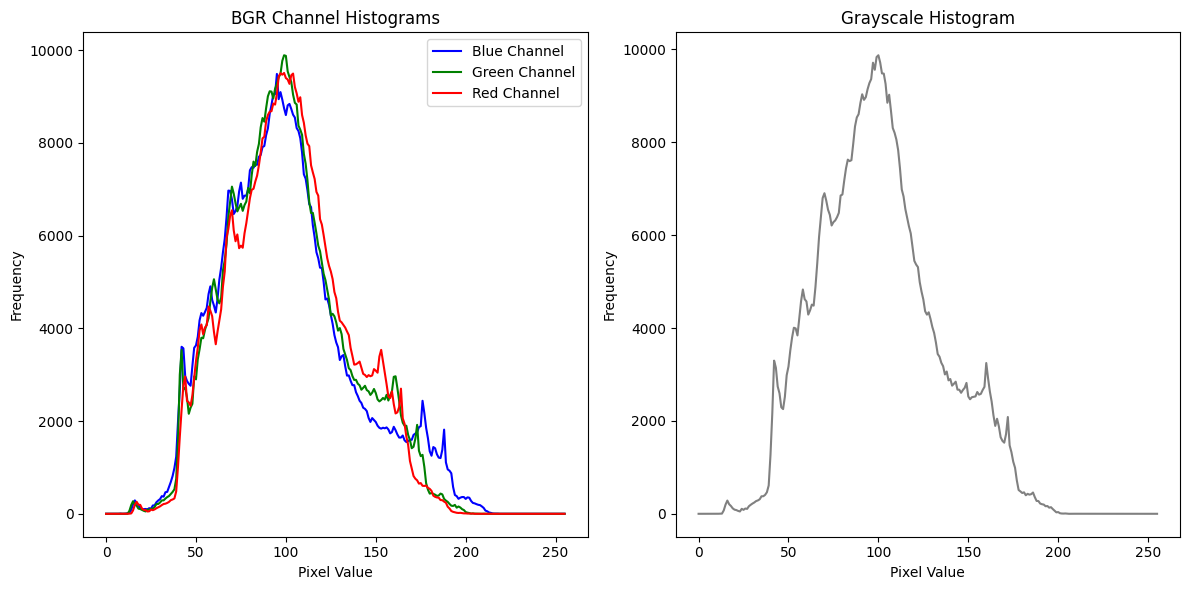

In [58]:
# Split the image into BGR channels
b, g, r = cv2.split(ImageDataSet)

# Convert the image to grayscale
gray_image = cv2.cvtColor(ImageDataSet, cv2.COLOR_BGR2GRAY)

# Calculate histograms for each channel
hist_b = cv2.calcHist([b], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([g], [0], None, [256], [0, 256])
hist_r = cv2.calcHist([r], [0], None, [256], [0, 256])
hist_gray = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

# Create subplots
plt.figure(figsize=(12, 6))

# Plot the BGR histograms
plt.subplot(1, 2, 1)
plt.plot(hist_b, color='blue', label='Blue Channel')
plt.plot(hist_g, color='green', label='Green Channel')
plt.plot(hist_r, color='red', label='Red Channel')
plt.title("BGR Channel Histograms")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.legend()

# Plot the grayscale histogram
plt.subplot(1, 2, 2)
plt.plot(hist_gray, color='gray', label='Grayscale')
plt.title("Grayscale Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()



📌 **note:** The output of this code showcases histograms for the individual color channels (Blue, Green, and Red) and the grayscale version of the image. These histograms provide a visual representation of the distribution of pixel values, helping in understanding the image's color and tonal characteristics.

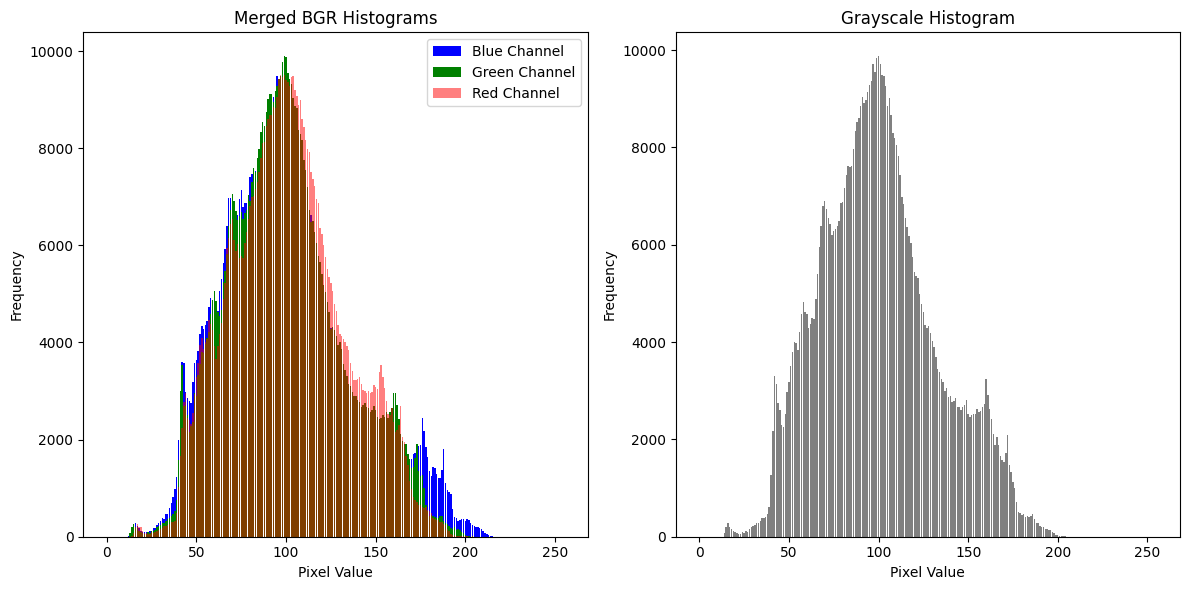

In [59]:

# Read the image
ImageDataSet = cv2.imread("/kaggle/input/cat-images/cat-image.jpg")

# Split the image into BGR channels
b, g, r = cv2.split(ImageDataSet)

# Convert the image to grayscale
gray_image = cv2.cvtColor(ImageDataSet, cv2.COLOR_BGR2GRAY)

# Calculate histograms for each channel
hist_b = cv2.calcHist([b], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([g], [0], None, [256], [0, 256])
hist_r = cv2.calcHist([r], [0], None, [256], [0, 256])
hist_gray = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

# Create subplots
plt.figure(figsize=(12, 6))

# Bar plot for the merged BGR histograms
plt.subplot(1, 2, 1)
plt.bar(range(256), hist_b.ravel(), color='blue', label='Blue Channel')
plt.bar(range(256), hist_g.ravel(), color='green', label='Green Channel')
plt.bar(range(256), hist_r.ravel(), color='red', label='Red Channel', alpha=0.5)
plt.title("Merged BGR Histograms")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.legend()

# Bar plot for the grayscale histogram
plt.subplot(1, 2, 2)
plt.bar(range(256), hist_gray.ravel(), color='gray', label='Grayscale')
plt.title("Grayscale Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")

plt.tight_layout()

# Show the plots
plt.show()


### Thresholding

Image datasets shape with GrayScale:  (692, 1000)
Image datasets shape with thresholded binary image:  (692, 1000)


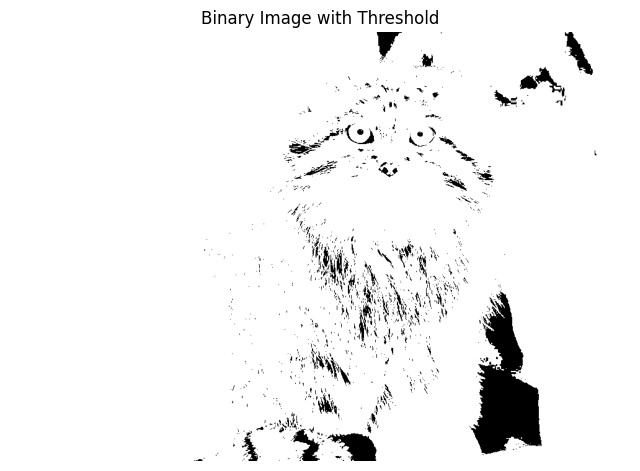

'\ncv2.imshow("Color Conversion Form BGR to Gray",imagethreshold)\ncv2.waitKey(0)\ncv2.destroyAllWindows()\n'

In [60]:
# Read the image
ImageDataSets = cv2.imread("/kaggle/input/cat-images/cat-image.jpg")

ImageDataSets = cv2.cvtColor(ImageDataSets, cv2.COLOR_BGR2GRAY)

# Print the shape of the grayscale image
print("Image datasets shape with GrayScale: ", ImageDataSets.shape)

# Apply a threshold to create a binary image
_, imagethreshold = cv2.threshold(ImageDataSets, 50, 200, cv2.THRESH_BINARY)

# Print the shape of the binary image
print("Image datasets shape with thresholded binary image: ", imagethreshold.shape)

# Create a Matplotlib figure
plt.figure(figsize=(8, 8))

# Display the thresholded binary image using imshow
plt.imshow(imagethreshold, cmap='gray')
plt.title("Binary Image with Threshold")
plt.axis('off')  # Hide axes

# Show the plot
plt.show()

#alternative
"""
cv2.imshow("Color Conversion Form BGR to Gray",imagethreshold)
cv2.waitKey(0)
cv2.destroyAllWindows()
"""


📌 **note:** The output result after plotting the thresholded binary image represents a simplified representation of the original image, where pixel values above a certain threshold are set to one color (e.g., white), and pixel values below the threshold are set to another color (e.g., black), making objects or regions of interest more distinct and visible.

### 👽 Contours

**Contours** are continuous curves that represent the boundaries of objects in an image. Outer contours define the outermost boundaries, while inner contours represent boundaries within larger objects or holes.

* **`contours:`** Store the coordinates of image contours.
* **`_:`** Hierarchy information (not used here).
* **`RETR_EXTERNAL:`** Retrieve only the external (outer) contours of objects in the image, ignoring nested contours.
* **`CHAIN_APPROX_SIMPLE:`** Simplify the contour representation by removing redundant points, reducing memory usage and speeding up contour processing.

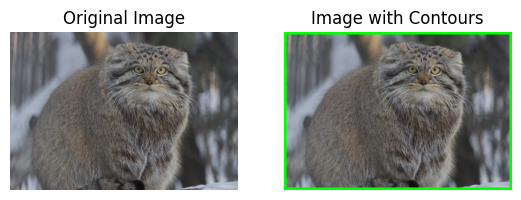

In [62]:
# Read the image
ImageDataSet = cv2.imread("/kaggle/input/cat-images/cat-image.jpg")

# Convert the image to grayscale
gray_image = cv2.cvtColor(ImageDataSet, cv2.COLOR_BGR2GRAY)

# Find contours in the grayscale image
contours, _ = cv2.findContours(gray_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a copy of the original image to draw contours on
contour_image = ImageDataSet.copy()

# Draw contours on the image
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 20)

# Display the original image and the image with contours
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(ImageDataSet, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.title("Image with Contours")
plt.axis('off')

plt.show()